## chargement des donnees 

In [53]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

spams = pd.read_csv("../spam.csv", header = 0, encoding = 'ISO-8859-14', sep = ',' )
spams.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
spams.shape

(5572, 5)

In [3]:
spams.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


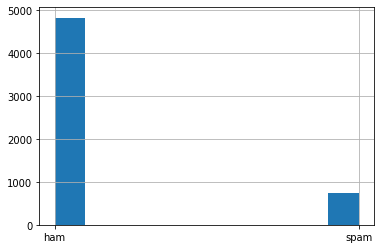

In [4]:
spams['v1'].hist()

## pretraitement

In [5]:
spams = spams[['v1', 'v2']] #on recupere les 2 colonnes les plus importantes
spams.columns = ['class', 'text'] #on renomme
spams.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
from sklearn.feature_extraction.text import  CountVectorizer

# on instancie le converteur de donnees texte de sklearn
data_converter = CountVectorizer()
v = data_converter.fit(spams.text)
# on realise la conversion
spam_convert = data_converter.fit_transform(spams.text)

In [7]:
data = spam_convert.toarray()
data.shape

(5572, 8681)

## classification par partitionnement (kmeans)

In [8]:
from sklearn.cluster import KMeans

clusterKmeans = KMeans(n_clusters= 2)
clusterKmeans.fit(data)

KMeans(n_clusters=2)

In [9]:
pd.DataFrame(clusterKmeans.cluster_centers_) 

,0,1,2,3,4,5,6,7,8,9,...,8671,8672,8673,8674,8675,8676,8677,8678,8679,8680
0,0.002013,0.002907,2.236136e-04,4.472272e-04,5.231275e-18,2.236136e-04,2.236136e-04,1.046255e-17,2.236136e-04,0.000447,...,1.341682e-03,0.000447,0.000447,0.001342,0.002460,5.231275e-18,2.236136e-04,2.236136e-04,2.236136e-04,5.231275e-18
1,0.000909,0.014545,1.626303e-18,3.252607e-18,9.090909e-04,1.626303e-18,1.626303e-18,1.818182e-03,1.626303e-18,0.005455,...,3.035766e-18,0.002727,0.000909,0.001818,0.001818,9.090909e-04,1.626303e-18,1.626303e-18,1.626303e-18,9.090909e-04


In [13]:
import numpy as np
kmeans_labels = clusterKmeans.labels_ 
np.unique(kmeans_labels)

array([0, 1], dtype=int32)

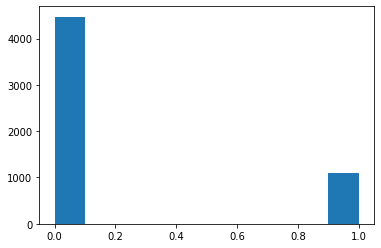

In [14]:
import matplotlib.pyplot as plt

plt.hist(kmeans_labels)
plt.show()

In [15]:
import numpy as np

kmeans_labels = np.where(kmeans_labels == 0, 'ham','spam')
kmeans_labels = np.array(kmeans_labels, dtype=object)
kmeans_labels

array(['ham', 'ham', 'spam', ..., 'ham', 'spam', 'ham'], dtype=object)

## classification hierarchique ascendante

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

z = linkage(data, method='ward')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [65.0, 65.0, 75.0, 75.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [70.0, 70.0, 92.5, 92.5],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [155.0, 155.0, 165.0, 165.0],
  [132.5, 132.5, 160.0, 160.0],
  [115.0, 115.0, 146.25, 146.25],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [130.625, 130.625, 182.5, 182.5],
  [205.0, 205.0, 215.0, 215.0],
  [156.5625, 156.5625, 210.0, 210.0],
  [245.0, 245.0, 255.0, 255.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [250.0, 250.0, 272.5, 272.5],
  [235.0, 235.0, 261.25, 261.25],
  [225.0, 225.0, 248.125, 248.125],
  [315.0, 315.0, 325.0, 325.0],
  [335.0, 335.0, 345.0, 345.0],
  [320.0, 320.0, 340.0, 340.0],
  [305.0, 305.0, 330.0, 330.0],
  [355.0, 355.0, 365.0, 365.0],
  [385.0, 385.0, 395.0, 395.0],
  [375.0, 375.0, 390.0, 390.0],
  [360.0, 360.0, 382.5, 382.5],
  [317

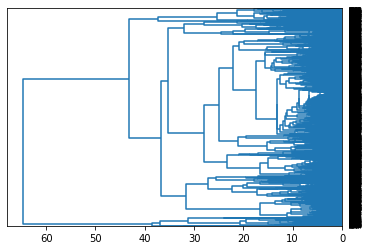

In [ ]:
dendrogram(z, orientation='left', color_threshold=0)

In [17]:
#decoupage en deux classes 
from scipy.cluster.hierarchy import fcluster
cah_labels = fcluster(z, t=50, criterion='distance')

In [18]:
np.unique(cah_labels)

array([1, 2], dtype=int32)

(array([ 210.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5362.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

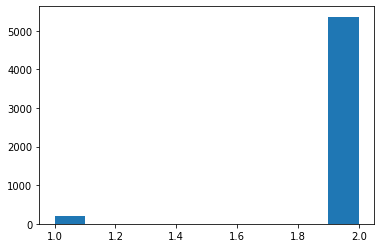

In [19]:
plt.hist(cah_labels)

In [20]:
cah_labels = np.where(cah_labels == 2, 'ham','spam')
cah_labels = np.array(cah_labels, dtype=object)
cah_labels

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

## clustering par modelisation de gaussienne

In [40]:
from sklearn.mixture import GaussianMixture

clusterGaussian = GaussianMixture(n_components=2)
clusterGaussian.fit(data)

GaussianMixture(n_components=2)

In [41]:
clusterGaussian.n_iter_

2

In [44]:
em_labels = clusterGaussian.predict(data)

In [45]:
np.unique(em_labels, return_counts=True)

(array([0, 1]), array([4630,  942]))

(array([4630.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         942.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

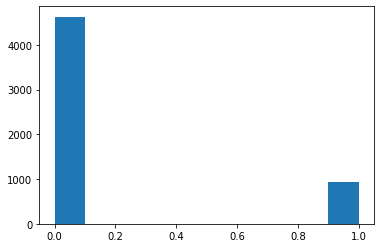

In [46]:
plt.hist(em_labels)


In [59]:
em_labels = np.where(em_labels == 0, 'ham','spam')
em_labels = np.array(em_labels, dtype=object)
em_labels

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

## resultats

In [54]:
def transform_dataframe(mat, etiquettes):
    p = pd.DataFrame(mat , columns = etiquettes)
    p.index = etiquettes
    return p

In [58]:
from sklearn.metrics import confusion_matrix

labels = spams['class'].values
etiquettes = ['ham', 'spam']
labels

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

### comparaison des etiqettes fournis par kmeans et ceux reelles 

In [61]:
matrice_confusion = confusion_matrix(y_true=labels, y_pred=kmeans_labels, labels=etiquettes)
matrice_confusion = transform_dataframe(matrice_confusion, etiquettes)
matrice_confusion

,ham,spam
ham,4012,813
spam,460,287


### comparaison des etiqettes fournis par la classification hierarchique ascendante et ceux reelles 

In [ ]:
matrice_confusion = confusion_matrix(y_true=labels, y_pred=cah_labels, labels=etiquettes)
matrice_confusion = transform_dataframe(matrice_confusion, etiquettes)
matrice_confusion

,ham,spam
ham,4619,206
spam,743,4


### comparaison des etiqettes fournis par la classification par modelisation et ceux reelles 

In [60]:
matrice_confusion = confusion_matrix(y_true=labels, y_pred=em_labels, labels=etiquettes)
matrice_confusion = transform_dataframe(matrice_confusion, etiquettes)
matrice_confusion

,ham,spam
ham,4109,716
spam,521,226


## interpretation

De part les resultats obtenus nous pouvons nous rendre compte que le meilleur classificateur s'appuyant sur l'apprentissage non supervisée est 
dans notre contexte de la detection de spam est le celui s'appuyant sur kmeans 
car permet de mieux regrouper les emails spams et hams que les autres.

Cela peut etre due au faite qu'au niveau de l'apprentissage on recherche des clusters qui ont le maximum de distance entre eux, et egalement par rapport a la distribution des donnees obtenues 